<a href="https://colab.research.google.com/github/rahimeg5236-dot/ML-Titanic-Project/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier as DT


In [5]:
!unzip /content/titanic.zip

Archive:  /content/titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [6]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [7]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
train_data.shape

(891, 12)

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


***fill null values***

In [12]:
train_data['Age']=train_data['Age'].fillna(train_data['Age'].mean())

In [13]:
print(train_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [14]:
train_data['Embarked']=train_data['Embarked'].fillna('S')

In [15]:
train_data = train_data.drop(['Cabin'], axis=1)

In [16]:
print(train_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


***visulization***

In [17]:
train_data['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [18]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

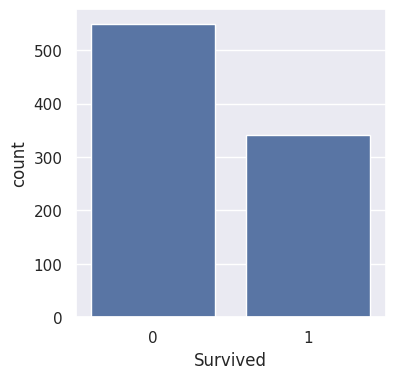

In [19]:
plt.figure(figsize=(4,4))
sns.countplot(x='Survived',data=train_data)

In [20]:
train_data['Sex'].value_counts()

,count
Sex,
male,577
female,314


<Axes: xlabel='Sex', ylabel='count'>

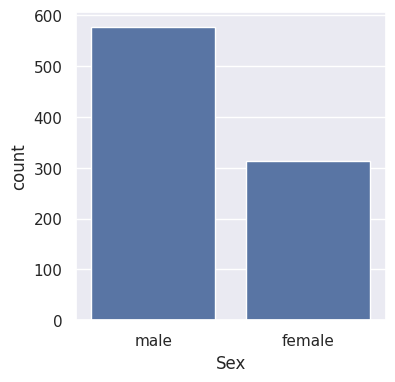

In [21]:
plt.figure(figsize=(4,4))
sns.countplot(x='Sex',data=train_data)

<Axes: xlabel='Survived', ylabel='count'>

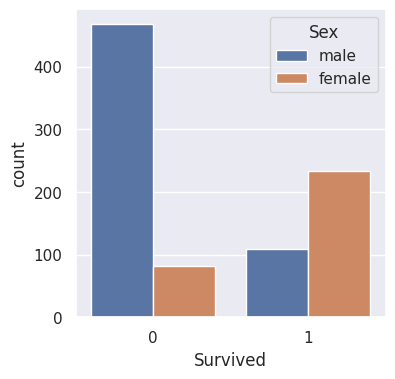

In [22]:
plt.figure(figsize=(4,4))
sns.countplot(x='Survived', hue='Sex',data=train_data)

In [23]:
train_data['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


<Axes: xlabel='Survived', ylabel='count'>

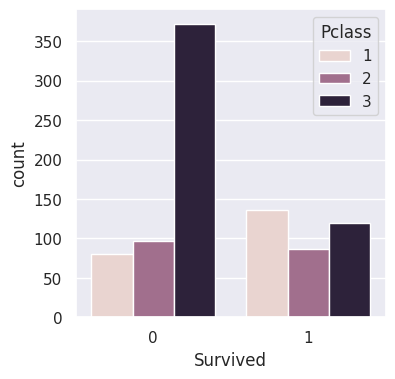

In [24]:
plt.figure(figsize=(4,4))
sns.countplot(x='Survived' , hue='Pclass',data=train_data)

***Encoding***

In [25]:
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [26]:
train_data = train_data.replace({'Sex':{'male':0, 'female':1}, 'Embarked': {'S':0, 'C':1, 'Q':2}})


/tmp/ipython-input-1506094656.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data = train_data.replace({'Sex':{'male':0, 'female':1}, 'Embarked': {'S':0, 'C':1, 'Q':2}})


In [27]:
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


***Split x,y***

In [28]:
x = train_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)
y = train_data['Survived']


In [29]:
x.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [30]:
y.head()


,Survived
0,0
1,1
2,1
3,1
4,0


***Modeling: using Logistic Regression***

In [31]:
model = LogisticRegression()


In [32]:
model.fit(x,y)


LogisticRegression()

In [33]:
x_pred = model.predict(x)
accuracy = accuracy_score(y, x_pred)
print('Accuracy score of training data : ', accuracy)


Accuracy score of training data :  0.8047138047138047


In [34]:
print(classification_report(y, x_pred))


              precision    recall  f1-score   support

           0       0.83      0.87      0.85       549
           1       0.77      0.71      0.74       342

    accuracy                           0.80       891
   macro avg       0.80      0.79      0.79       891
weighted avg       0.80      0.80      0.80       891



***Modelng using:Decision Tree***


In [35]:
Model = DT()


In [36]:
Model.fit(x, y)


DecisionTreeClassifier()

In [37]:
x_pred_DT = Model.predict(x)
accuracy_DT = accuracy_score(y, x_pred_DT)
print('Accuracy score of training data : ', accuracy_DT)


Accuracy score of training data :  0.9820426487093153


In [38]:
print(classification_report(y, x_pred_DT))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       549
           1       0.99      0.96      0.98       342

    accuracy                           0.98       891
   macro avg       0.98      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891



***Test Prepocressing***

In [39]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [40]:
test_data.shape

(418, 11)

In [41]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [42]:
print(test_data.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [43]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())


In [44]:
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())


In [45]:
print(test_data.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


***Encoding***

In [46]:
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

In [47]:
cols_to_drop = ['Name', 'Ticket', 'Cabin', 'PassengerId']

In [48]:
test_data.drop(columns=cols_to_drop, inplace=True)

In [49]:
print("Final Shape:", test_data.shape)

Final Shape: (418, 7)


In [50]:
test_data = test_data.replace({'Embarked':{'S':0, 'C':1, 'Q':2}})

/tmp/ipython-input-3750493845.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data = test_data.replace({'Embarked':{'S':0, 'C':1, 'Q':2}})


In [51]:
print(test_data.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  34.5      0      0   7.8292         2
1       3    1  47.0      1      0   7.0000         0
2       2    0  62.0      0      0   9.6875         2
3       3    0  27.0      0      0   8.6625         0
4       3    1  22.0      1      1  12.2875         0


***Inference***

In [52]:
label_map = {
    0: "Did not Survive",
    1: "Survived"
}

Sex_map = {
    "male": 0,
    "female": 1
}

Embarked_map = {
    "cherbourg": 1,
    "queenstown": 2,
    "southampton": 0
}

# Collect user input
Pclass = int(input("Enter class (1, 2, 3): "))
Sex_input = input("Enter sex (male/female): ").lower()
Embarked_input = input("Enter embarked (Cherbourg/Queenstown/Southampton): ").lower()
Age = float(input("Enter age: "))
SibSp = float(input("Enter Sibling/Spouse count: "))
Parch = float(input("Enter Parent/Child count: "))
Fare = float(input("Enter fare: "))

# Convert text to numeric
Sex = Sex_map.get(Sex_input)
Embarked = Embarked_map.get(Embarked_input)

# Check for invalid input
if Sex is None:
    print("Invalid sex entered!")
    exit()

if Embarked is None:
    print("Invalid embarked location entered!")
    exit()

# Prepare input for model
input_data = np.array([[Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]])

# Make prediction
prediction = Model.predict(input_data)[0]

# Print results
print("\n🚢 Titanic Survival Prediction:")
print("--------------------------------")
print(f"Class: {Pclass}")
print(f"Sex: {Sex_input}")
print(f"Age: {Age}")
print(f"SibSp: {SibSp}")
print(f"Parch: {Parch}")
print(f"Fare: {Fare}")
print(f"Embarked: {Embarked_input}")
print("--------------------------------")
print(f"Prediction: {label_map[prediction]}")

Enter class (1, 2, 3): 3
Enter sex (male/female): male
Enter embarked (Cherbourg/Queenstown/Southampton): Queenstown
Enter age: 34.5
Enter Sibling/Spouse count: 0
Enter Parent/Child count: 0
Enter fare: 7.8292

🚢 Titanic Survival Prediction:
--------------------------------
Class: 3
Sex: male
Age: 34.5
SibSp: 0.0
Parch: 0.0
Fare: 7.8292
Embarked: queenstown
--------------------------------
Prediction: Did not Survive


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
